# Exploratory Data Analysis

In [7]:
# Import Necessary Libraries
import zipfile
import os
import matplotlib.pyplot as plt
import shutil
import pandas as pd
import cv2

### Unzip Data

In [ ]:
archive_path = '/content/drive/MyDrive/Capstone/archive.zip'
extract_path = 'drive/MyDrive/Capstone/kaggle_doodles'

In [ ]:
# Multiple extract attempts which failed due to browser or connection issues
# made the need for extracting only the remaining files necessary

def extract_no_replace(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.infolist()
        file_count = len(file_list)

        print("Extracting...")

        extracted_count = 0
        for i, member in enumerate(file_list):
            target_path = os.path.join(extract_to, member.filename)

            # Ensure directories exist before extraction
            if member.is_dir():
                print(target_path)
                os.makedirs(target_path, exist_ok=True)
                continue  # Skip to next entry

            os.makedirs(os.path.dirname(target_path), exist_ok=True)

            if not os.path.exists(target_path):
                if 'zebra' in target_path:
                  print(target_path)  # Avoid overwriting existing files
                zip_ref.extract(member, extract_to)
                extracted_count += 1

            # Progress indicator
            if (i + 1) % max(1, file_count // 100) == 0 or i + 1 == file_count:
                print(f"{(i + 1) / file_count * 100:.2f}% Complete")

        print(f"Extraction complete: {extracted_count} new files extracted.")

# Example Usage
extract_no_replace(archive_path, extract_path)


Extracting...
1.00% Complete
2.00% Complete
3.00% Complete
4.00% Complete
5.00% Complete
6.00% Complete
7.00% Complete
8.00% Complete
9.00% Complete
10.00% Complete
11.00% Complete
12.00% Complete
13.00% Complete
14.00% Complete
15.00% Complete
16.00% Complete
17.00% Complete
18.00% Complete
19.00% Complete
20.00% Complete
21.00% Complete
22.00% Complete
23.00% Complete
24.00% Complete
25.00% Complete
26.00% Complete
27.00% Complete
28.00% Complete
29.00% Complete
30.00% Complete
31.00% Complete
32.00% Complete
33.00% Complete
34.00% Complete
35.00% Complete
36.00% Complete
37.00% Complete
38.00% Complete
39.00% Complete
40.00% Complete
41.00% Complete
42.00% Complete
43.00% Complete
44.00% Complete
45.00% Complete
46.00% Complete
47.00% Complete
48.00% Complete
49.00% Complete
50.00% Complete
51.00% Complete
52.00% Complete
53.00% Complete
54.00% Complete
55.00% Complete
56.00% Complete
57.00% Complete
58.00% Complete
59.00% Complete
60.00% Complete
61.00% Complete
62.00% Complete
63.

### Import CSV Data

In [3]:
kaggle_doodle_df = pd.read_csv("/content/drive/MyDrive/Capstone/master_doodle_dataframe.csv")
kaggle_doodle_df.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,RO,"[[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...",5613582005829632,True,traffic light,data/traffic light/5613582005829632.png
1,US,"[[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...",5769631006457856,True,traffic light,data/traffic light/5769631006457856.png
2,ZA,"[[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...",4999795544424448,True,traffic light,data/traffic light/4999795544424448.png
3,VN,"[[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...",4878417906368512,True,traffic light,data/traffic light/4878417906368512.png
4,HU,"[[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...",5572841187573760,True,traffic light,data/traffic light/5572841187573760.png


In [4]:
word_unique_values = kaggle_doodle_df['word'].value_counts()

print('maximum count of a doodle type:', word_unique_values.max())
print('minimum count of a doodle type:', word_unique_values.min())

maximum count of a doodle type: 3000
minimum count of a doodle type: 3000


In [5]:
print(len(word_unique_values))

340


In [6]:
print(kaggle_doodle_df.isnull().sum())
print(kaggle_doodle_df.isna().sum())

countrycode    46
drawing         0
key_id          0
recognized      0
word            0
image_path      0
dtype: int64
countrycode    46
drawing         0
key_id          0
recognized      0
word            0
image_path      0
dtype: int64


### Sample Image

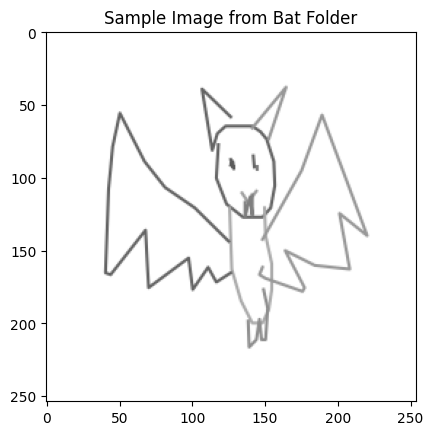

In [9]:
image_cv2 = cv2.imread("/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/bat/6482096434446336.png")
image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Sample Image from Bat Folder")
plt.show()